In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv")
df
y = df["logS"]
y
x = df.drop('logS', axis=1)
x
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)
y_lr_train_pred
y_lr_test_pred






Train MSE: 1.00754
Train R2: 0.76451
Test MSE: 1.02070
Test R2: 0.78916


In [9]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

print(f"Train MSE: {lr_train_mse:.5f}")
print(f"Train R2: {lr_train_r2:.5f}") 
print(f"Test MSE: {lr_test_mse:.5f}")
print(f"Test R2: {lr_test_r2:.5f}")
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ["Method", "Train MSE", "Train R2", "Test MSE", "Test R2"]
lr_results

Train MSE: 1.00754
Train R2: 0.76451
Test MSE: 1.02070
Test R2: 0.78916


,Method,Train MSE,Train R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


In [10]:

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ["Method", "Train MSE", "Train R2", "Test MSE", "Test R2"]
rf_results
df_models = pd.concat([lr_results, rf_results], axis=0)

df_models.reset_index(drop=True)
df_models



,Method,Train MSE,Train R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
0,Random Forest,1.028228,0.759669,1.407688,0.709223


-2.9915859090377364
-2.9915859090377364


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


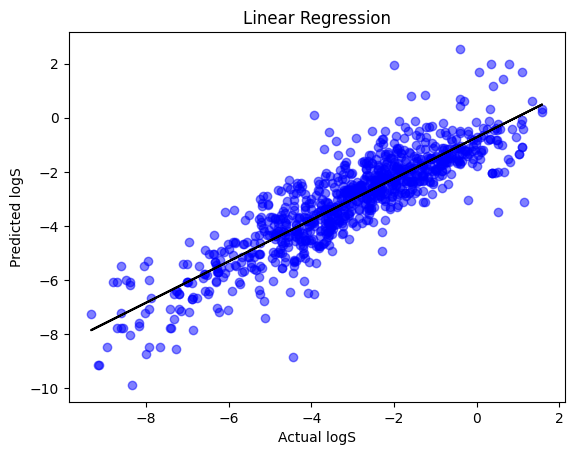

In [8]:
# Data Visualization
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x=y_train, y=y_lr_train_pred, color='blue', label='Train', alpha=0.5)
z = np.polyfit(y_train, y_lr_train_pred, 1)
p=np.poly1d(z)
#plt.scatter(x=y_test, y=y_lr_test_pred, color='red', label='Test', alpha=0.5)
plt.plot(y_train, p(y_train), color='black')
plt.ylabel('Predicted logS')
plt.xlabel('Actual logS')
plt.title('Linear Regression')
import numpy as np

print(lr.predict(np.array([[2.811400000000001,134.22199999999998,2.0,0.6]])).__getitem__(0))

def mp(input):
    return lr.predict(input).__getitem__(0)
print(mp(np.array([[2.811400000000001,134.22199999999998,2.0,0.6]])))